In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('outputTopCap.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change())

In [5]:
data.to_excel('outputTopCapReturns2.xlsx', index=False)

In [7]:
eff = np.array([data.iloc[:, i].sum() / len(data) for i in range(len(data.columns))])

In [9]:
for i in range(len(data.columns)):
    data.iloc[:, i] -= eff[i]
data = data ** 2
print(data.head())
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))])

   601398.SS  600519.SS  601288.SS  601857.SS  601988.SS  601939.SS  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   0.000019   0.000127   0.000158   0.000054   0.000005   0.000014   
2   0.000076   0.000025   0.000037   0.000863   0.000064   0.000112   
3   0.000327   0.002502   0.000504   0.003532   0.000665   0.000733   
4   0.000043   0.000096   0.000248   0.000412   0.000008   0.000080   

   601628.SS  600036.SS  600028.SS  601088.SS  600900.SS     601318.SS  \
0        NaN        NaN        NaN        NaN        NaN           NaN   
1   0.000489   0.000010   0.000082   0.000144   0.000002  1.663734e-04   
2   0.000008   0.000019   0.001061   0.008806   0.000009  4.071072e-07   
3   0.005260   0.001437   0.002809   0.010288   0.000899  5.056239e-04   
4   0.000273   0.000066   0.000618   0.008437   0.000102  2.294699e-05   

   000858.SZ  000333.SZ  
0        NaN        NaN  
1   0.000132   0.002618  
2   0.000431   0.000044  
3   0.002647   0.007355 

In [11]:
print(eff)
print(risk)

[ 1.76785424e-04  1.99079122e-03  1.87547093e-04 -6.58040836e-05
 -2.64169789e-04  1.11702638e-04 -2.71401108e-04  2.38071415e-04
  6.27261876e-04  6.42844936e-04  1.30560208e-05  2.30862584e-04
  1.30425969e-03  1.59407821e-03]
[0.00855164 0.01644543 0.00839719 0.01233985 0.01058748 0.01054679
 0.01999512 0.0121079  0.01315155 0.01987116 0.00939866 0.01159753
 0.01914478 0.02145223]


   effiency      risk    company
0  0.000177  0.008552  601398.SS
1  0.001991  0.016445  600519.SS
2  0.000188  0.008397  601288.SS
3 -0.000066  0.012340  601857.SS
4 -0.000264  0.010587  601988.SS


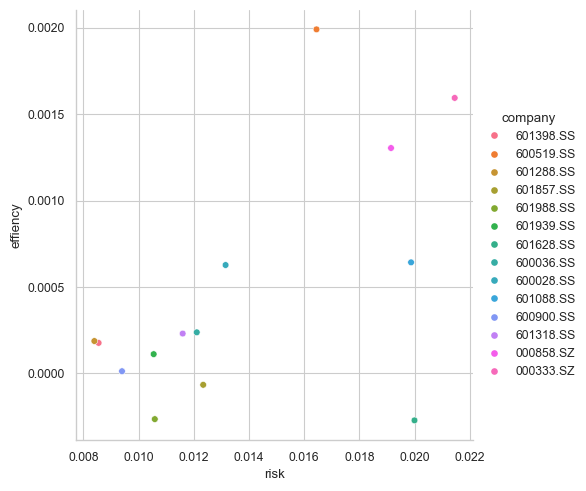

In [13]:
import seaborn as sns

sns.set_theme('paper')

data_eff_risk = pd.DataFrame({'effiency': eff,'risk':risk, 'company': data.columns})
print(data_eff_risk.head())
sns.set_style("whitegrid")
sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", hue="company"
)